In [1]:
"""
Lab 8 - COEN 140
Marianne Fuyu Yamazaki Dorr
11/7/2022

K-means Clustering using Python.

Overview of algorithm 
1. Randomly choose K centroids (in practice we often choose them from the existing data 
points) 

2. Calculate the distance of all instances to the K centroids and assign instances to closest 
centroid 

3. Calculate new centroid for each of the K clusters 

4. Repeat Step 2 and 3 until clusters assignments are stable or centroids are not changing 
The MNIST dataset is a dataset of 28 × 28 images of hand-written digits (http:// 
yann.lecun.com/exdb/mnist/). To read these images in Python, you can use the following 
script.

from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1) 
X = mnist["data"] 

Since the dataset is quite large, restrict yourself to the first 2000 training images. The data 
should be a 2000 × 784 matrix. 

Requirements 

a. Write a function my_kmeans to perform a k-means clustering of the 2000 images of digits. 

b. Your function should take 3 arguments, the data matrix, the number of clusters K, and the 
number of initializations M.  

    (1) Your code should consist of 3 nested loops. 

    (2) The outermost (from 1 to M) cycles over random centroids initializations (i.e. you will 
call k-means M times with different initializations). 

    (3) The second loop is the actual k-means algorithm for that initialization, and cycles over 
the iterations of k-means.  

    (4) Inside this are the actual iterations of k-means. Each iteration can have 2 successive 
loops from 1 to K: the first assigns observations to each cluster and the second 
recalculates the means of each cluster. 

c. Your function should return: 

    (1) the K centroids and cluster assignments for the best solution with the lowest loss 
function (recall that the k-means loss function is the sum of the squared distances of 
observations from their assigned means) 

    (2) the sequence of values of the loss-function over k-means iterations for the best solution 
(this should be non-increasing) 

    (3) the set of M terminal loss-function values for all initializations  
    
d.   Run your code on the 2000 digits for K = 10 and M = 15. Plot the sequence of values of the   
loss-function over k-means iterations for the best solution.

e.   Plot the M terminal loss-function values for all initializations. 
"""

import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# download the set by using fetch_openml module
mnist = fetch_openml('mnist_784', version=1) 
dataset = mnist["data"]

# we only need the first 2000 images
dataset = dataset[:2000]


print(dataset.shape)
dataset.head()

(2000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
def my_kmeans(data, K, M):
    n = len(data)
    data = np.asarray(data)
    
    final_clusters = []
    final_centroids = []
    losses = []
    final_losses = []
    
    M_terminal = []
    #run M initializations
    for i in range(M):
        category = np.zeros(n)
        
        # initialize our random K centroids
        inits = np.random.choice(2000, K, replace=False)
        
        # fill initial centroid list with K random points from the matrix
        centroids = np.asarray([data[index] for index in inits])
        
        loss = []
        
        while True:
            for j in range(n):
                #get distance between points and centroid
                dist = np.linalg.norm(data[j]-centroids, axis = 1)
                cluster = np.argmin(dist)
                #assign category of data point
                category[j] = cluster
            
            test = np.copy(centroids)
            
            loss_val = 0
            #loss function -> recompute centroids
            for j in range(K):
                cluster_pts = []
                #check if each data point belongs to the current centroid K
                for m in range(n):
                    if (category[m] == j):
                        
                        cluster_pts.append(data[m])
                        
                centroids[j] = np.mean(cluster_pts, axis = 0)
                #calculate M-terminal 
                for instance in cluster_pts:
                    loss_val += np.linalg.norm(instance-centroids[j])
            loss_val = loss_val / n
            loss.append(loss_val)
            #break out of loop if previous centroids are equal to current centroids   
            if np.all(np.equal(test, centroids)):
                break
        #Plot current initialization    
        M_terminal.append(loss_val)
            
        final_centroids.append(centroids)
        final_clusters.append(cluster_pts)
        losses.append(loss)
        final_losses.append(loss[-1])
            
        plt.plot(loss)
        plt.title("Initialization: {}".format(i+1))
        plt.xlabel("K-value")
        plt.ylabel("Loss")
        plt.show()
    #Plot M-terminals        
    x = []
    for initialization in range(M):
        x.append(initialization)
    plt.plot(x, M_terminal)
    plt.title("M terminal loss-function values for all initializations")
    plt.xlabel("Initialization")
    plt.ylabel("M terminal")
    plt.show()
        
    min_i = final_losses.index(min(final_losses))
    best_val = [final_centroids[min_i], final_clusters[min_i], losses[min_i], final_losses]
    return best_val


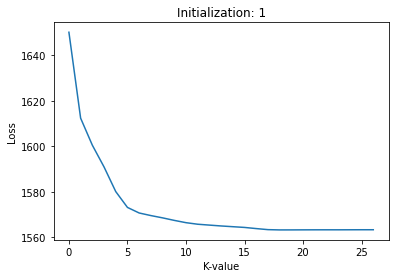

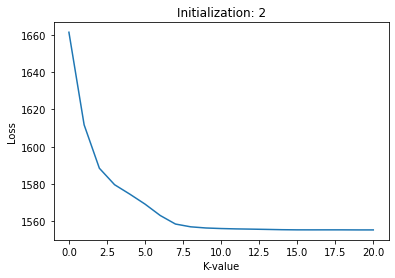

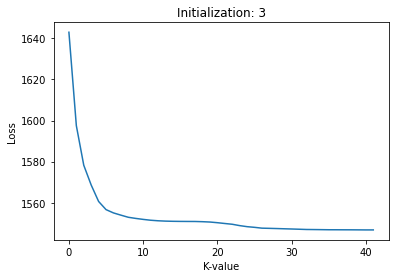

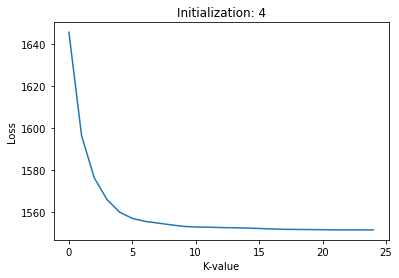

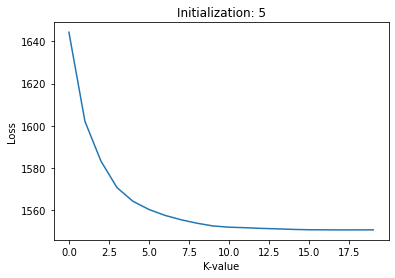

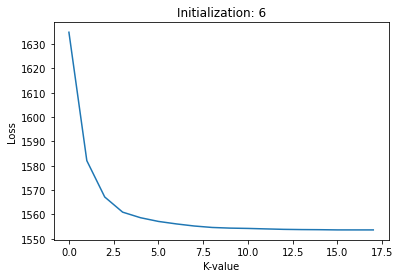

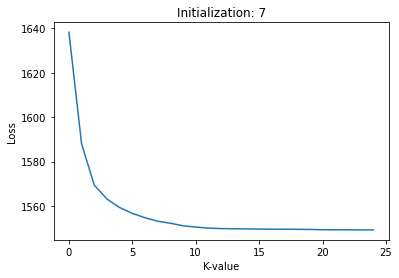

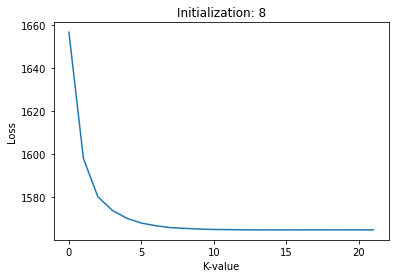

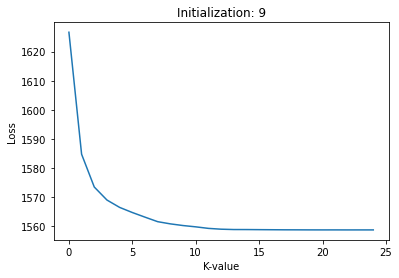

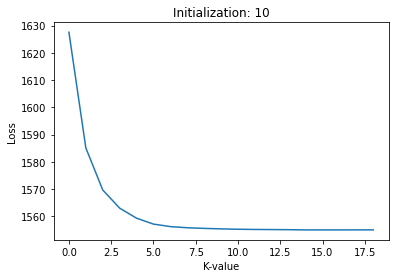

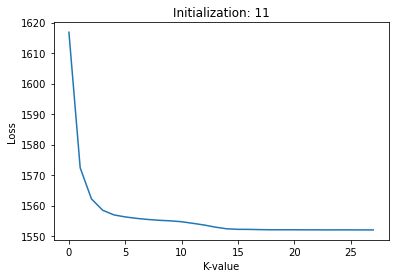

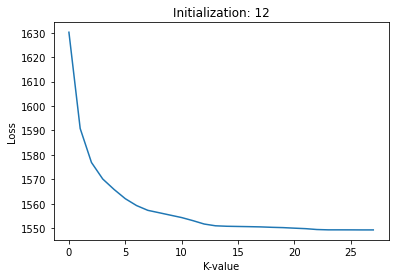

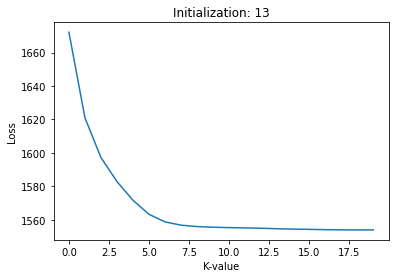

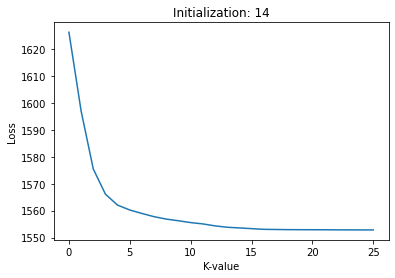

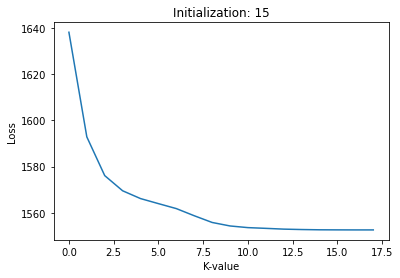

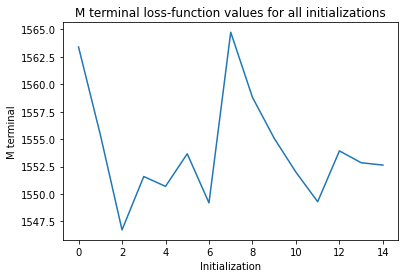

Best K centroids: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 Best cluster assignments:
 [array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0

In [38]:
K = 10
M = 15
result = my_kmeans(dataset, K, M)

print("Best K centroids: \n", result[0])
print("\n Best cluster assignments:\n", result[1])
print("\n Sequence of values of the loss-function over k-means iterations: \n", result[2])
print("\n M terminal loss-function values for all initializations:", result[3])